In [2]:
print("Hello world")
%pylab inline

Hello world
Populating the interactive namespace from numpy and matplotlib


In [3]:
import scipy

In [4]:
import scipy.io.wavfile

In [5]:
scipy.io.wavfile.read('test.wav')

(44100, array([[  0,   0],
        [ -1,   0],
        [  0,   0],
        ...,
        [144, 163],
        [113, 147],
        [ 73,  88]], dtype=int16))

In [6]:
freq, data = scipy.io.wavfile.read('test.wav')

In [7]:
print(freq)

44100


In [8]:
print(data)

[[  0   0]
 [ -1   0]
 [  0   0]
 ...
 [144 163]
 [113 147]
 [ 73  88]]


In [9]:
print(len(data))

8833224


In [10]:
print(data[0])

[0 0]


In [11]:
for i in range(0,30):
    print(data[i])

[0 0]
[-1  0]
[0 0]
[ 0 -1]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[-5 -4]
[7 7]
[-17 -16]
[30 29]
[-88 -84]
[-347 -338]
[-384 -389]
[-407 -390]
[-386 -349]
[-418 -412]
[-433 -413]
[-409 -389]
[-356 -342]
[-329 -318]
[-404 -397]
[-462 -443]
[-410 -394]
[-424 -406]
[-432 -428]
[-422 -427]


In [12]:
c = asarray(data, dtype = np.int16)

In [13]:
print(c)

[[  0   0]
 [ -1   0]
 [  0   0]
 ...
 [144 163]
 [113 147]
 [ 73  88]]


In [14]:
scipy.io.wavfile.write('reecrit.wav', freq, c)

In [15]:
duree = ((1.0*(len(data)))/(freq))

In [16]:
print(duree)

200.29986394557824


In [17]:
len(data)

8833224

In [18]:
len(data) /  44100

200.29986394557824

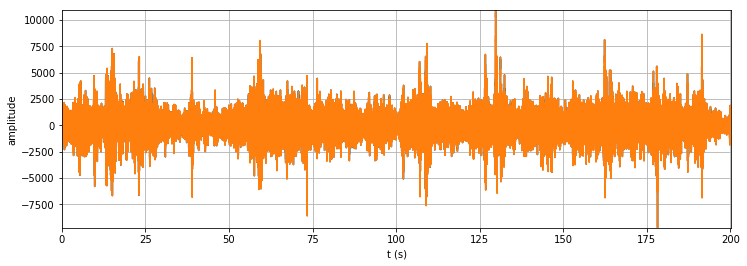

In [19]:
n = len(data)
te = 1.0/freq
t = zeros(n)
for k in range(n):
    t[k] = te*k
figure(figsize=(12,4))
plot(t,data)
xlabel("t (s)")
ylabel("amplitude") 
axis([0,duree,data.min(),data.max()])
grid()

In [ ]:
#Ce bloc fait crasher le noyau
def tracerSpectre(data,rate,debut,duree):
    start = int(debut*rate)
    stop = int((debut+duree)*rate)
    spectre = absolute(fft.fft(data[start:stop]))
    spectre = spectre/spectre.max()#fait un ratio
    n = spectre.size
    freq = zeros(n)
    for k in range(n):
        freq[k] = 1.0/n*rate*k
    vlines(freq,[0],spectre,'r')
    xlabel('f (Hz)')
    ylabel('A')
    axis([0,0.5*rate,0,1])
    grid()


figure(figsize=(12,4))
tracerSpectre(data,freq,0,len(data))
axis([0,50000,0,1])


In [20]:
spectre = absolute(fft.fft(data[0:len(data)]))
print(spectre)

[[  0.   0.]
 [  1.   1.]
 [  0.   0.]
 ...
 [307.  19.]
 [260.  34.]
 [161.  15.]]


In [21]:
len(spectre)

8833224

In [33]:
#test du suppression des hautes fréquences
spectretest = []
print(len(spectretest))
for freq in spectre:
    if (freq[0] > 20 and freq [1] > 20) and (freq[0] < 20000 and freq[1] < 20000):
        spectretest += [freq]
print(len(spectretest))
#print(spectretest) # Fais planter le noyau

0
2908390


In [48]:
#Test de réécoute après réduction du spectre
signal = fft.ifft(spectretest).real
print(signal)
freq2 = 44100
scipy.io.wavfile.write('reecrit.wav', freq2, signal)

[[386. 349.]
 [514. 487.]
 [468. 438.]
 ...
 [264. 236.]
 [123. 102.]
 [147. 113.]]
